# TP N°3 — Minería de Datos (TUIA)
**Año:** 2025 • **Materia:** Data Mining • **Integrantes:** Fabrizio Tapia, Sebastian Palacio

**Datasets:**  
- dxWeather.csv (Predicción de estaciones) https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/

**Objetivo:**  
Integrar los conocimientos adquiridos en las unidades 5 y 6 en un problema real asociado a la determinación de la estación del año mediante la medición de atributos característicos

## 1.1 Carga y Exploración Inicial del Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import OrdinalEncoder
import warnings
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
estaciones = pd.read_csv('dxWeather.csv')


print("INFORMACIÓN GENERAL DEL DATASET \n")
print(f"Dimensiones: {estaciones.shape[0]} filas x {estaciones.shape[1]} columnas")
print(f"\nColumnas: {list(estaciones.columns)}")
print(f"\nTipos de datos:")
print(estaciones.dtypes)

INFORMACIÓN GENERAL DEL DATASET 

Dimensiones: 10090 filas x 8 columnas

Columnas: ['Temperatura', 'Humedad', 'VientoVelocidad', 'Precipitation', 'PresionAtmosferica', 'Localizacion', 'TipoClima', 'Estacion']

Tipos de datos:
Temperatura             int64
Humedad                 int64
VientoVelocidad       float64
Precipitation           int64
PresionAtmosferica    float64
Localizacion           object
TipoClima              object
Estacion               object
dtype: object


In [8]:
diccionario_variables = {
    'Temperatura': 'Temperatura medida en grados Celsius',
    'Humedad': 'Humedad medida en porcentaje',
    'VientoVelocidad': 'Velocidad del viento medida en km/h',
    'Precipitation': 'Precipitación medida en porcentaje',
    'PresionAtmosferica': 'Presión atmosférica medida en hPa',
    'Localizacion': 'Localización de donde fue tomada la medición',
    'TipoClima': 'Tipo de clima',
    'Estacion': 'Estación meteorológica (target)'
}

print("DICCIONARIO DE VARIABLES \n")

for variable, descripcion in diccionario_variables.items():
    print(f"• {variable:20s} → {descripcion}")

DICCIONARIO DE VARIABLES 

• Temperatura          → Temperatura medida en grados Celsius
• Humedad              → Humedad medida en porcentaje
• VientoVelocidad      → Velocidad del viento medida en km/h
• Precipitation        → Precipitación medida en porcentaje
• PresionAtmosferica   → Presión atmosférica medida en hPa
• Localizacion         → Localización de donde fue tomada la medición
• TipoClima            → Tipo de clima
• Estacion             → Estación meteorológica (target)


In [5]:
estaciones.describe()

,Temperatura,Humedad,VientoVelocidad,Precipitation,PresionAtmosferica
count,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000
mean,21.872349,67.195045,9.634936,50.796333,1007.685836
std,16.426722,20.463797,6.795890,32.333798,38.763971
min,-24.000000,20.000000,0.000000,0.000000,800.230000
25%,13.000000,55.000000,5.000000,18.000000,998.570000
50%,23.000000,69.000000,8.500000,53.000000,1010.315000
75%,32.000000,81.000000,13.500000,80.000000,1017.820000
max,109.000000,109.000000,47.500000,109.000000,1199.210000


In [9]:
print("VALORES FALTANTES:\n")

faltantes = estaciones.isnull().sum()

faltantes_pct = (faltantes / len(estaciones)) * 100

df_faltantes = pd.DataFrame({
    'Columna': faltantes.index,
    'Valores Faltantes': faltantes.values,
    'Porcentaje': faltantes_pct.values
})

print(df_faltantes)
print("\n")

print(f"DUPLICADOS: {estaciones.duplicated().sum()}")


VALORES FALTANTES:

              Columna  Valores Faltantes  Porcentaje
0         Temperatura                  0         0.0
1             Humedad                  0         0.0
2     VientoVelocidad                  0         0.0
3       Precipitation                  0         0.0
4  PresionAtmosferica                  0         0.0
5        Localizacion                  0         0.0
6           TipoClima                  0         0.0
7            Estacion                  0         0.0


DUPLICADOS: 0


## 1.3 Análisis Exploratorio de Datos (EDA)

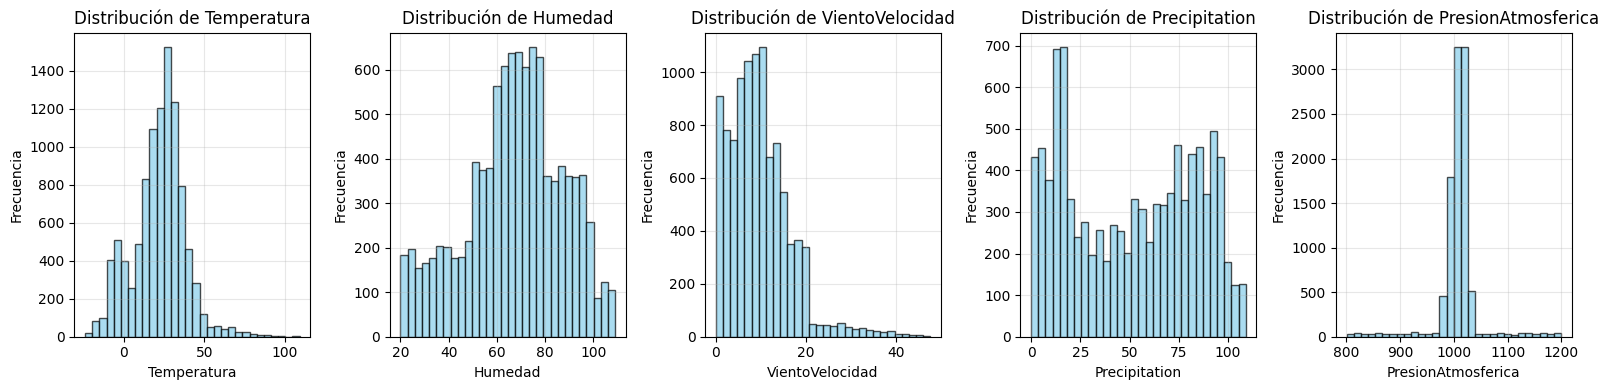

In [11]:
# Distribución de variables numéricas
columnas_numericas = ['Temperatura', 'Humedad', 'VientoVelocidad', 'Precipitation', 'PresionAtmosferica']

fig, axes = plt.subplots(1, 5, figsize=(16, 4))

for i, col in enumerate(columnas_numericas):
    axes[i].hist(estaciones[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

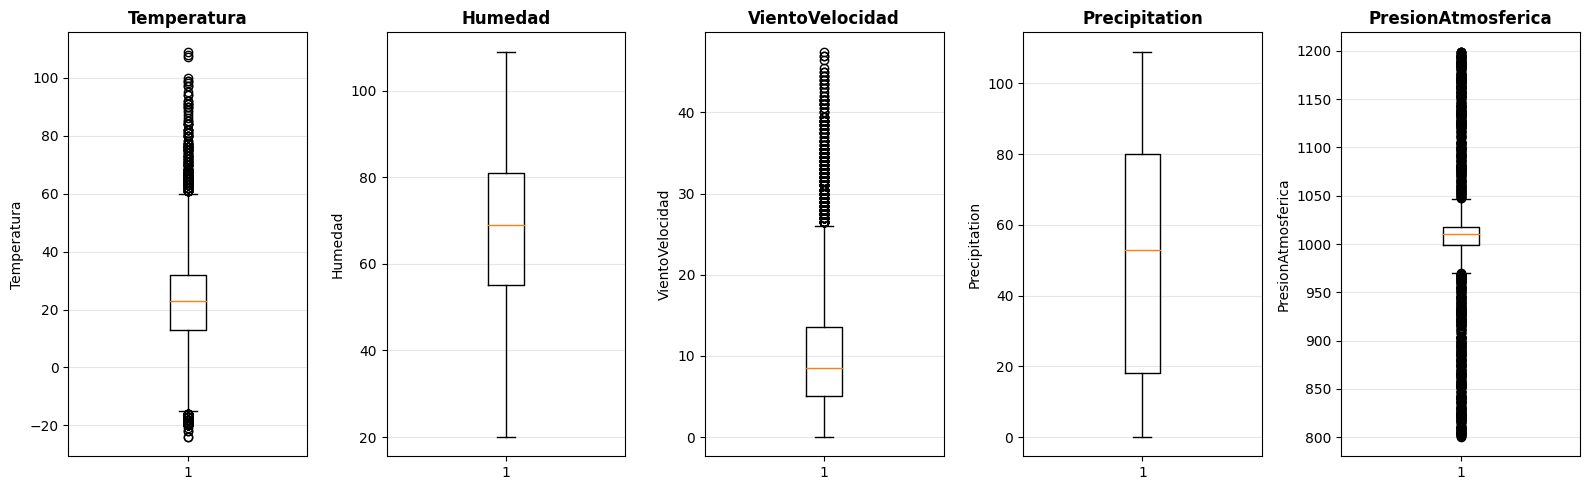

In [23]:
# Boxplot de las variables numéricas
fig, axes = plt.subplots(1, 5, figsize=(16, 5))

for i, col in enumerate(columnas_numericas):
    axes[i].boxplot(estaciones[col], vert=True)
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col}', fontweight='bold')
    axes[i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### EN ESTOS HAY QUE CORREGIR ETIQUETAS


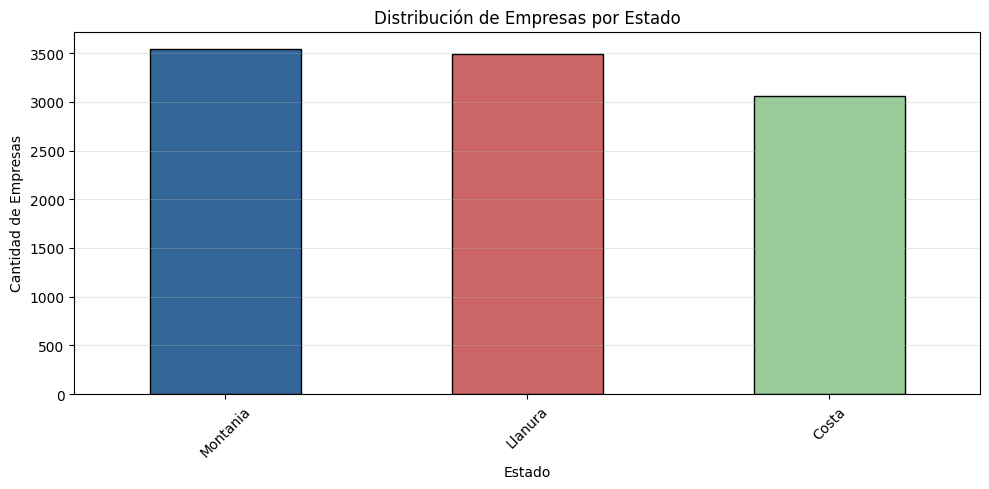


Distribución por Estado:
Localizacion
Montania    3541
Llanura     3489
Costa       3060
Name: count, dtype: int64

Porcentaje por Estado:
Localizacion
Montania    35.09
Llanura     34.58
Costa       30.33
Name: count, dtype: float64


In [15]:
conteo_estados = estaciones['Localizacion'].value_counts()

paleta = ['#336699', '#CC6666', '#99CC99']

plt.figure(figsize=(10, 5))
conteo_estados.plot(kind='bar', color= paleta, edgecolor='black')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Empresas')
plt.title('Distribución de Empresas por Estado')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nDistribución por Estado:")
print(conteo_estados)
print(f"\nPorcentaje por Estado:")
print((conteo_estados / len(estaciones) * 100).round(2))

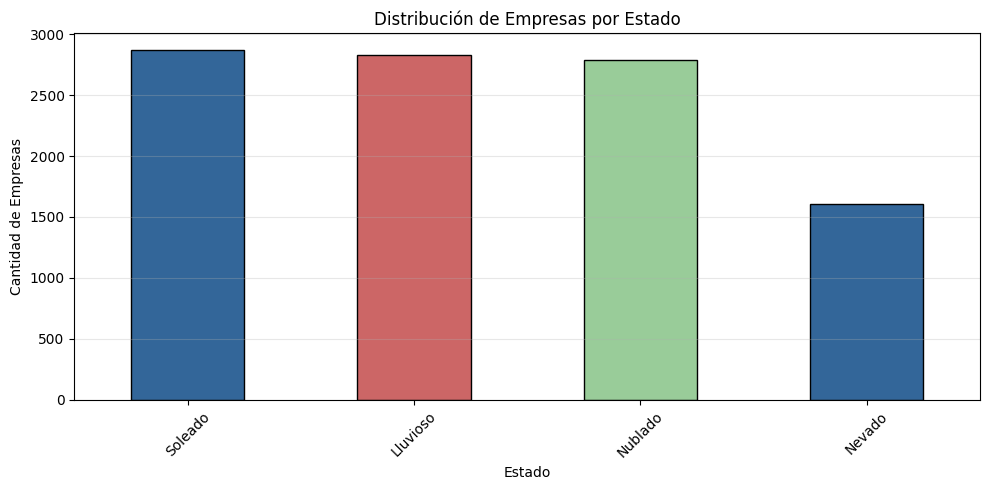


Distribución por Estado:
TipoClima
Soleado     2867
Lluvioso    2830
Nublado     2790
Nevado      1603
Name: count, dtype: int64

Porcentaje por Estado:
TipoClima
Soleado     28.41
Lluvioso    28.05
Nublado     27.65
Nevado      15.89
Name: count, dtype: float64


In [17]:
conteo_estados = estaciones['TipoClima'].value_counts()

paleta = ['#336699', '#CC6666', '#99CC99']

plt.figure(figsize=(10, 5))
conteo_estados.plot(kind='bar', color= paleta, edgecolor='black')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Empresas')
plt.title('Distribución de Empresas por Estado')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nDistribución por Estado:")
print(conteo_estados)
print(f"\nPorcentaje por Estado:")
print((conteo_estados / len(estaciones) * 100).round(2))

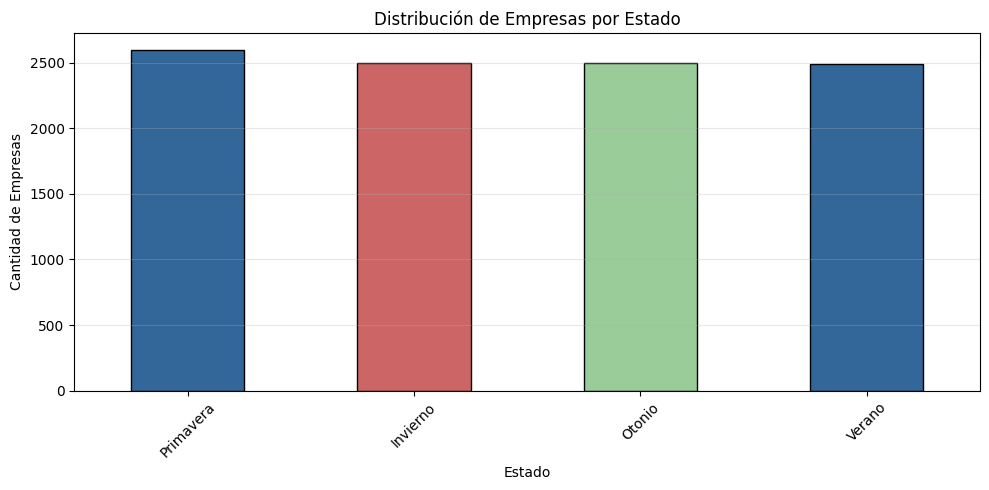


Distribución por Estado:
Estacion
Primavera    2598
Invierno     2500
Otonio       2500
Verano       2492
Name: count, dtype: int64

Porcentaje por Estado:
Estacion
Primavera    25.75
Invierno     24.78
Otonio       24.78
Verano       24.70
Name: count, dtype: float64


In [18]:
conteo_estados = estaciones['Estacion'].value_counts()

paleta = ['#336699', '#CC6666', '#99CC99']

plt.figure(figsize=(10, 5))
conteo_estados.plot(kind='bar', color= paleta, edgecolor='black')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Empresas')
plt.title('Distribución de Empresas por Estado')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nDistribución por Estado:")
print(conteo_estados)
print(f"\nPorcentaje por Estado:")
print((conteo_estados / len(estaciones) * 100).round(2))

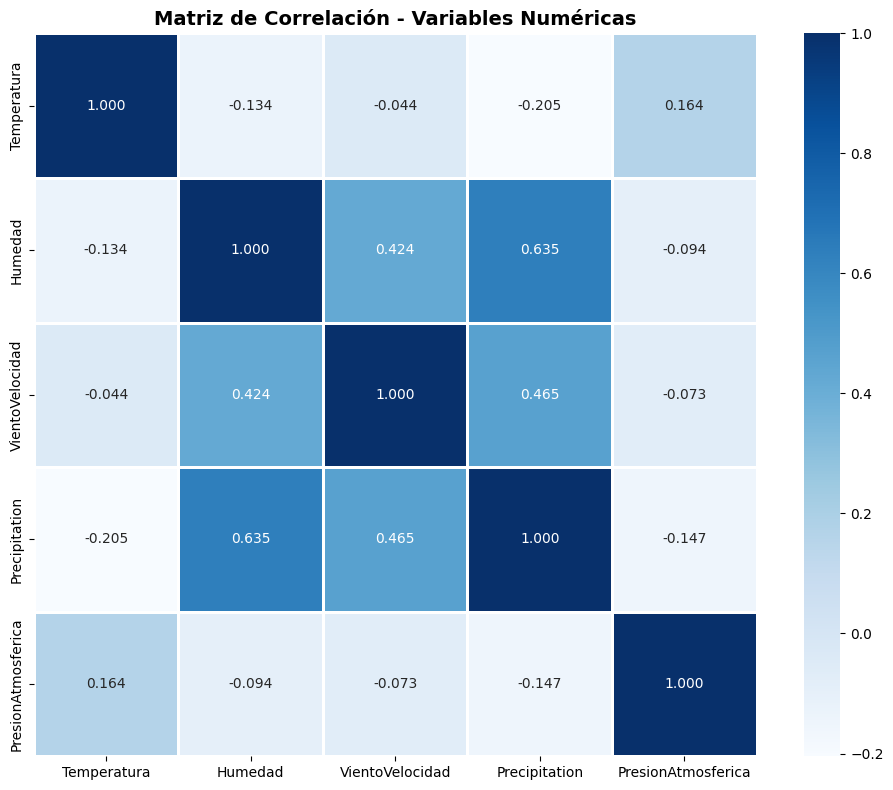

In [22]:
# Matriz de correlación
datos_numericos = estaciones.select_dtypes(include=[np.number])
matriz_correlacion = datos_numericos.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt='.3f', cmap='Blues', square=True, linewidths=1)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()